In [ ]:
!pip install ucimlrepo

In [ ]:
import ucimlrepo

In [ ]:
abalone = ucimlrepo.fetch_ucirepo(id=1)

In [ ]:
[ l for l in dir(abalone) if l[0] != '_' ]

['clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [ ]:
import pandas as pd
from sklearn import model_selection

In [ ]:
abalone.keys()

dict_keys(['data', 'metadata', 'variables'])

In [ ]:
abalone.get('variables')

,name,role,type,demographic,description,units,missing_values
0,Sex,Feature,Categorical,None,"M, F, and I (infant)",None,no
1,Length,Feature,Continuous,None,Longest shell measurement,mm,no
2,Diameter,Feature,Continuous,None,perpendicular to length,mm,no
3,Height,Feature,Continuous,None,with meat in shell,mm,no
4,Whole_weight,Feature,Continuous,None,whole abalone,grams,no
5,Shucked_weight,Feature,Continuous,None,weight of meat,grams,no
6,Viscera_weight,Feature,Continuous,None,gut weight (after bleeding),grams,no
7,Shell_weight,Feature,Continuous,None,after being dried,grams,no
8,Rings,Target,Integer,None,+1.5 gives the age in years,None,no


In [ ]:
abalone.get('data').keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [ ]:
abalone.get('data')['features']

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
feats = abalone.get('data')['features'].copy()
targets = abalone.get('data')['targets'].copy()

In [ ]:
feats.Sex.value_counts()

,count
Sex,
M,1528
I,1342
F,1307


In [ ]:
featsNoNan = feats.loc[ feats.Sex != 'I' ]
featsNoNan['Sex'] = featsNoNan['Sex'].map({
    'M': 0.0,
    'F': 1.0
}).astype(float)
targetsNoNan = targets.loc[ feats.Sex != 'I' ]

<ipython-input-10-2867615884>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featsNoNan['Sex'] = featsNoNan['Sex'].map({


In [ ]:
featsNoNan.dtypes

,0
Sex,float64
Length,float64
Diameter,float64
Height,float64
Whole_weight,float64
Shucked_weight,float64
Viscera_weight,float64
Shell_weight,float64


In [ ]:
featsNoNan['Sex'].value_counts()

,count
Sex,
0.0,1528
1.0,1307


In [ ]:
featsNoNan['Sex']

,Sex
0,0.0
1,0.0
2,1.0
3,0.0
6,1.0
...,...
4172,1.0
4173,0.0
4174,0.0
4175,1.0


In [ ]:
feats.shape, targets.shape, featsNoNan.shape, targetsNoNan.shape

((4177, 8), (4177, 1), (2835, 8), (2835, 1))

In [ ]:
#feats2 = pd.concat([featsNoNan, pd.get_dummies(featsNoNan['Sex'], prefix='Sex').astype(float)], axis=1)
#feats2.shape

(2835, 10)

In [ ]:
#feats['Sex'] = feats.Sex.replace({'M': 0, 'F': 1, 'I': 2})
#feats = feats.drop(columns=['Sex'])

<ipython-input-6-4146921466>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  feats['Sex'] = feats.Sex.replace({'M': 0, 'F': 1, 'I': 2})
<ipython-input-6-4146921466>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feats['Sex'] = feats.Sex.replace({'M': 0, 'F': 1, 'I': 2})


In [ ]:
#feats2 = feats2.drop(columns=['Sex'])
#feats2

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.0,1.0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,1.0,0.0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0,0.0


<Axes: >

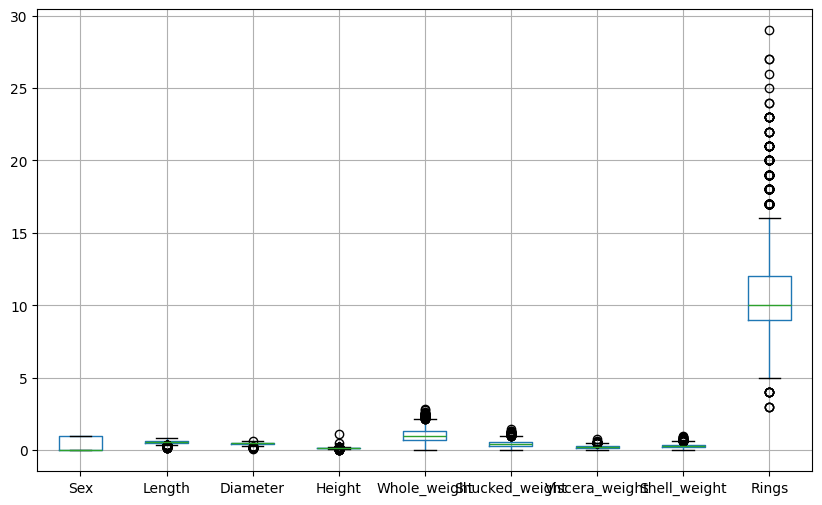

In [ ]:
pd.concat([featsNoNan, targetsNoNan]).boxplot(figsize=(10, 6))

In [ ]:
#targets = abalone.get('data')['targets']

In [ ]:
#feats3 = pd.concat([feats, targets], axis=1)
#feats3

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='Sex'>

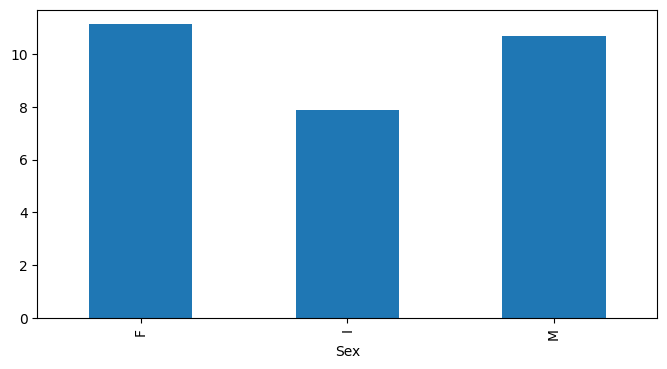

In [ ]:
#fig, ax = plt.subplots(figsize=(8, 4))
#(feats3
#  .groupby('Sex')
#  .Rings
#  .mean()
#  .plot.bar(ax=ax)
#)

,Rings
Sex,
F,"Axes(0.125,0.11;0.775x0.77)"
I,"Axes(0.125,0.11;0.775x0.77)"
M,"Axes(0.125,0.11;0.775x0.77)"


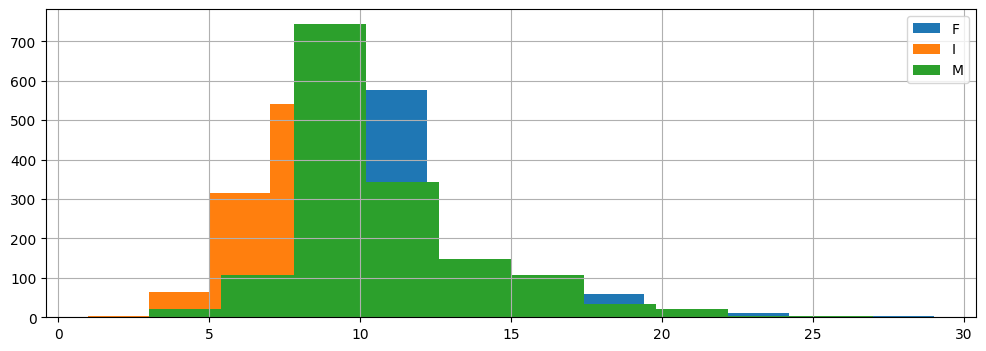

In [ ]:
#fig, ax = plt.subplots(figsize=(12, 4))
#(feats3
#  .groupby('Sex')
#  .Rings
#  .hist(legend=True, ax=ax)
#)

In [ ]:
_ = feats3.groupby('Sex').Rings
[ l for l in dir(_) if l[0] != '_' ]

['agg',
 'aggregate',
 'all',
 'any',
 'apply',
 'bfill',
 'corr',
 'count',
 'cov',
 'cumcount',
 'cummax',
 'cummin',
 'cumprod',
 'cumsum',
 'describe',
 'diff',
 'dtype',
 'ewm',
 'expanding',
 'ffill',
 'fillna',
 'filter',
 'first',
 'get_group',
 'groups',
 'head',
 'hist',
 'idxmax',
 'idxmin',
 'indices',
 'is_monotonic_decreasing',
 'is_monotonic_increasing',
 'last',
 'max',
 'mean',
 'median',
 'min',
 'ndim',
 'ngroup',
 'ngroups',
 'nlargest',
 'nsmallest',
 'nth',
 'nunique',
 'ohlc',
 'pct_change',
 'pipe',
 'plot',
 'prod',
 'quantile',
 'rank',
 'resample',
 'rolling',
 'sample',
 'sem',
 'shift',
 'size',
 'skew',
 'std',
 'sum',
 'tail',
 'take',
 'transform',
 'unique',
 'value_counts',
 'var']

In [ ]:
#feats4 = pd.concat([feats2, targets], axis=1)
#feats4

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0.0,1.0,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0,0.0,1.0,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1.0,0.0,0.0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.0,0.0,1.0,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,1.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1.0,0.0,0.0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.0,0.0,1.0,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.0,0.0,1.0,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0,0.0,0.0,10


In [ ]:
import numpy as np

In [ ]:
# emphasis on features
(
  pd.concat([ featsNoNan.drop(columns=['Sex']), targetsNoNan ], axis=1)
  .corr()
  .apply(np.abs)
  .style
  .background_gradient(cmap='Blues', vmax=1, vmin=0)
  .set_sticky(axis='index')
)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.978017,0.700392,0.921738,0.886616,0.888590,0.867281,0.311761
Diameter,0.978017,1.000000,0.708706,0.917171,0.873718,0.877102,0.877115,0.339400
Height,0.700392,0.708706,1.000000,0.716792,0.660641,0.686743,0.714636,0.334905
Whole_weight,0.921738,0.917171,0.716792,1.000000,0.956118,0.947327,0.929890,0.327539
Shucked_weight,0.886616,0.873718,0.660641,0.956118,1.000000,0.900791,0.822242,0.167702
Viscera_weight,0.888590,0.877102,0.686743,0.947327,0.900791,1.000000,0.854351,0.275209
Shell_weight,0.867281,0.877115,0.714636,0.929890,0.822242,0.854351,1.000000,0.465545
Rings,0.311761,0.339400,0.334905,0.327539,0.167702,0.275209,0.465545,1.000000


In [ ]:
# emphasis on target
R = pd.concat([ featsNoNan, targetsNoNan ], axis=1).corr()['Sex']
(
  pd.DataFrame(R)
  .apply(np.abs)
  .style
  .background_gradient(cmap='Blues', vmax=1, vmin=0)
)

,Sex
Sex,1.000000
Length,0.092109
Diameter,0.097662
Height,0.088329
Whole_weight,0.060583
Shucked_weight,0.031113
Viscera_weight,0.074110
Shell_weight,0.077554
Rings,0.068843


In [ ]:
import xgboost as xgb

In [ ]:
X = pd.concat([ featsNoNan, targetsNoNan ], axis=1).drop(columns='Sex')
y = featsNoNan['Sex'].astype(int)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1984, 8), (851, 8), (1984,), (851,))

In [ ]:
xgb1 = xgb.XGBClassifier(n_estimators=10, max_depth=3)
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# overfitting does not seem to be a major issue here
xgb1.score(X_train, y_train), xgb1.score(X_test, y_test)

(0.6265120967741935, 0.5569917743830788)

<Axes: >

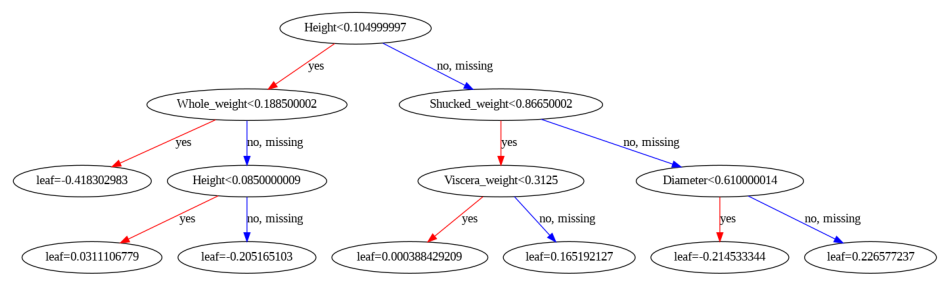

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
xgb.plot_tree(xgb1, num_trees=0, ax=ax)